In [5]:
import pandas as pd

In [6]:
payout_data = pd.read_csv('doordash powers payouts.csv')

In [7]:
payout_data.head()

,Store ID,Store Name,Business ID,Merchant Store ID,Payout Date,Currency,Subtotal,Subtotal Tax Passed by DoorDash to Merchant,Commission,Commission Tax,...,Delivery Order Fee,Pickup Order Fee,Subscription Fee,Customer Discounts from Marketing | (Funded by You),Customer Discounts from Marketing | (Funded by DoorDash),Customer Discounts from Marketing | (Funded by a Third-party),Marketing Fees | (Including any applicable taxes),DoorDash Marketing Credit,Third-party Contribution,Adjustments
0,657157,McDonald's (1447-LINDNWLD-W HORSE),5579,1447,2025-07-28,USD,17248.63,973.06,1952.48,0.0,...,0.0,0.0,0.0,-2560.98,-134.17,0.0,-456.39,134.17,0.0,82.50
1,659406,McDonald's (4592-OCEAN CITY),5579,4592,2025-07-28,USD,7761.69,454.87,878.72,0.0,...,0.0,0.0,0.0,-895.78,-22.26,0.0,-162.36,22.26,0.0,37.83
2,946236,McDonald's (12008-CROSS KEYS),5579,12008,2025-07-28,USD,6106.48,350.60,706.68,0.0,...,0.0,0.0,0.0,-814.41,-58.18,0.0,-95.04,58.18,0.0,29.35
3,946241,McDonald's (18170-NO WOODBURY),5579,18170,2025-07-28,USD,13700.43,794.27,1587.53,0.0,...,0.0,0.0,0.0,-1711.00,-103.98,0.0,-250.13,103.98,0.0,59.81
4,946252,McDonald's (18576-WINSLOW),5579,18576,2025-07-28,USD,11211.50,658.45,1418.76,0.0,...,0.0,0.0,0.0,-1274.05,-118.23,0.0,-92.07,118.23,0.0,50.52


In [8]:
payout_data.columns

Index(['Store ID', 'Store Name', 'Business ID', 'Merchant Store ID',
       'Payout Date', 'Currency', 'Subtotal',
       'Subtotal Tax Passed by DoorDash to Merchant', 'Commission',
       'Commission Tax', 'Drive Charge',
       'Marketing Fees (for historical reference only) | (All discounts and fees)',
       'Marketing Fee Tax (for historical reference only) | (Taxes on any applicable marketing fees)',
       'Alcohol Flat Fee', 'Alcohol Flat Fee Tax', 'Bag Fee', 'Bag Fee Tax',
       'Cup Fee', 'Cup Fee Tax', 'Snap Ebt Discount', 'Error Charges',
       'Adjustments | (for historical reference only)',
       'Total Before Adjustments', 'Net Payout',
       'Transactions Start Local Date', 'Transactions End Local Date',
       'Transactions Start UTC Date', 'Transactions End UTC Date', 'Payout ID',
       'Payout Status', 'Tax Remitted by DoorDash to State', 'Printer Fee',
       'Tablet Fee', 'Payment Processing Fee', 'Delivery Order Fee',
       'Pickup Order Fee', 'Subscription

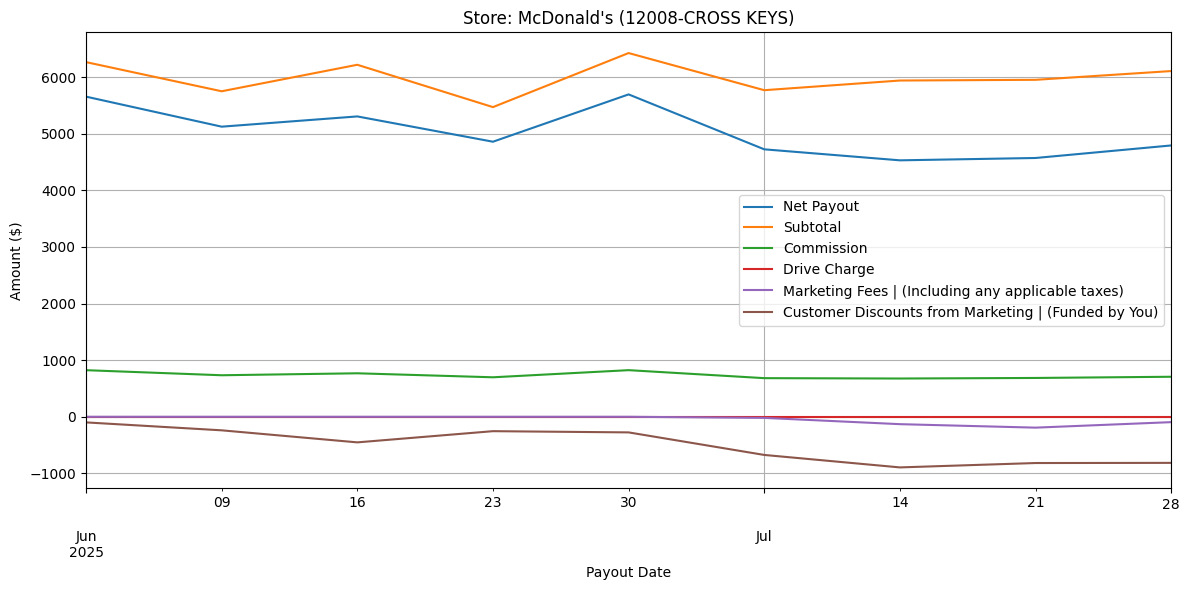

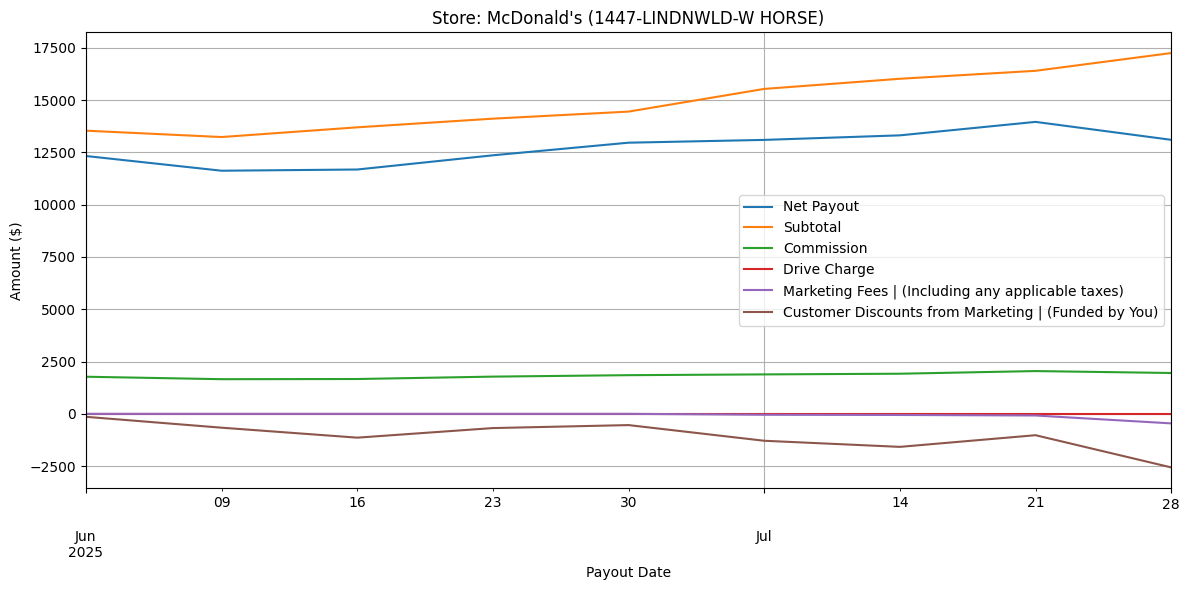

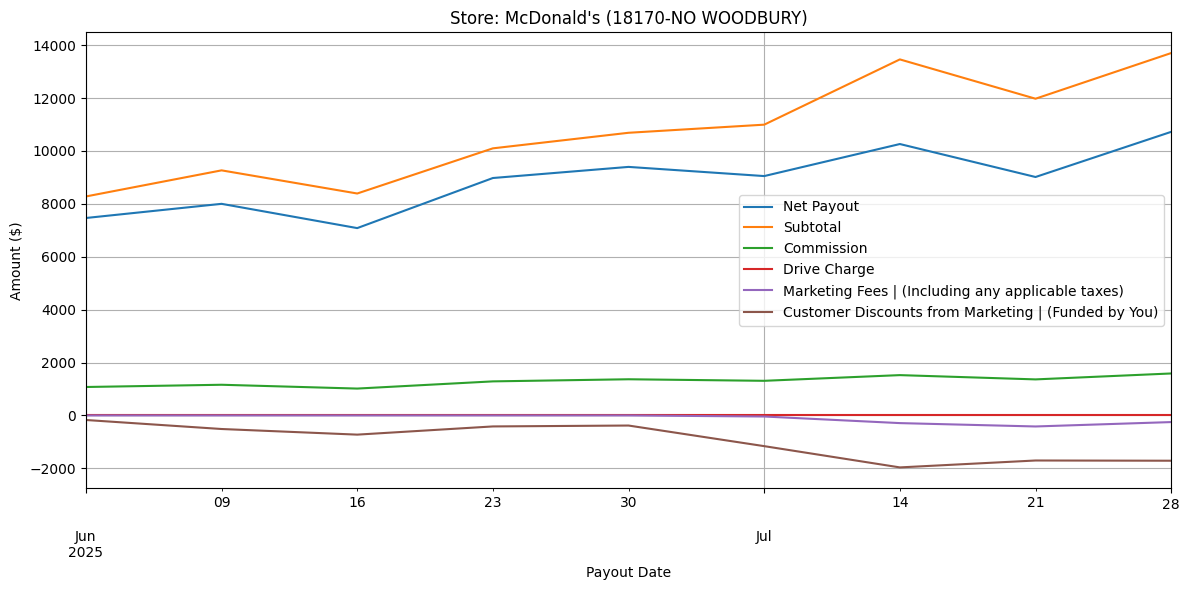

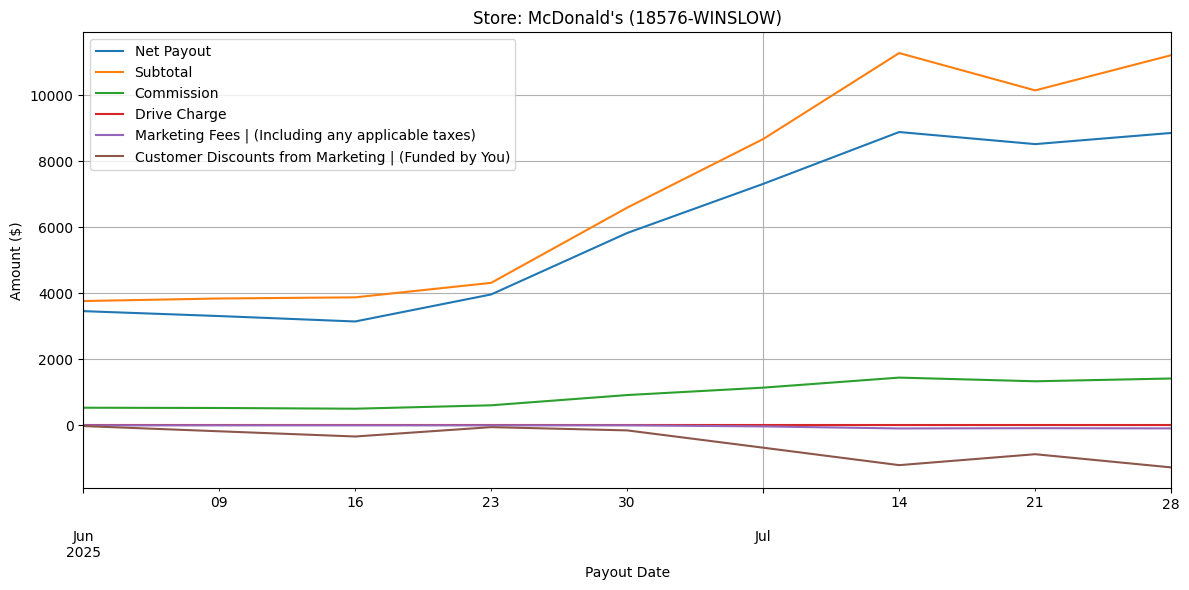

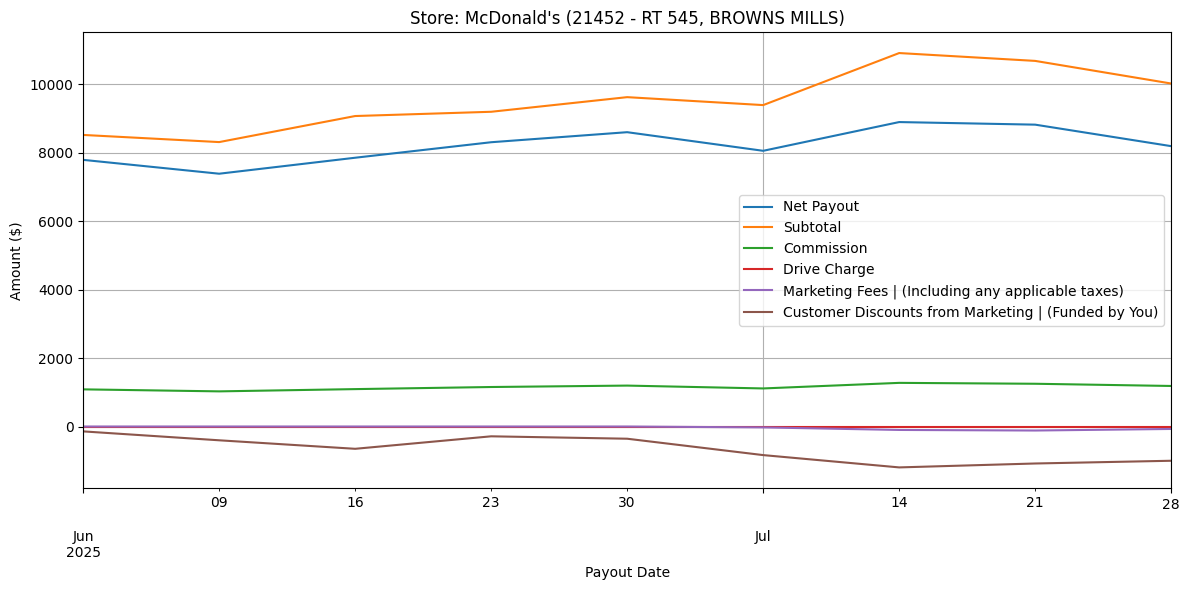

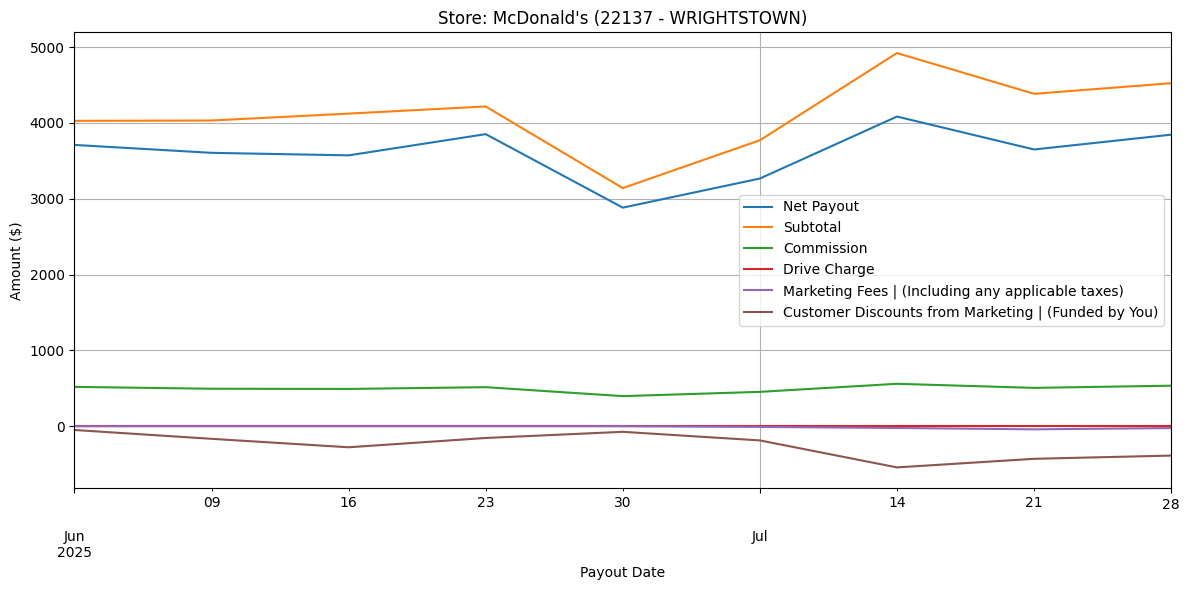

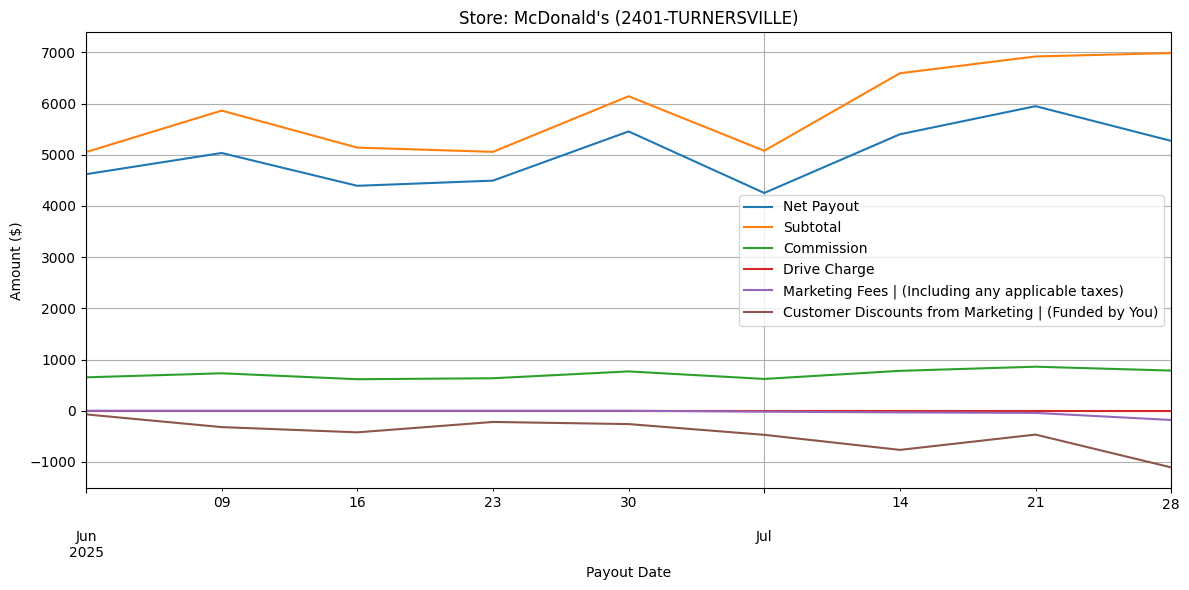

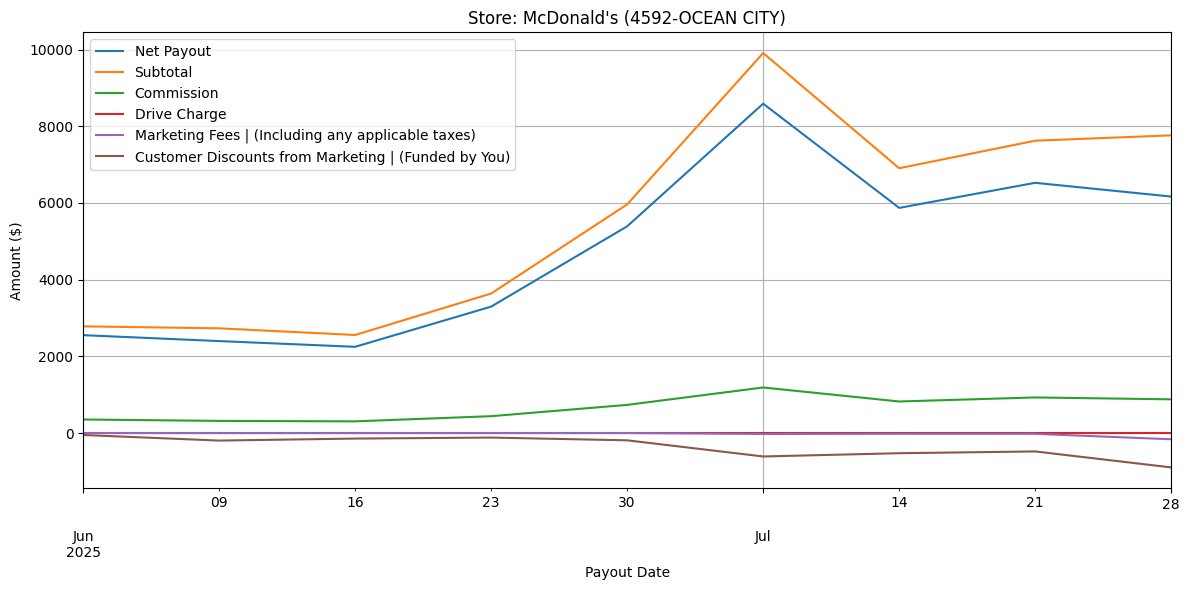

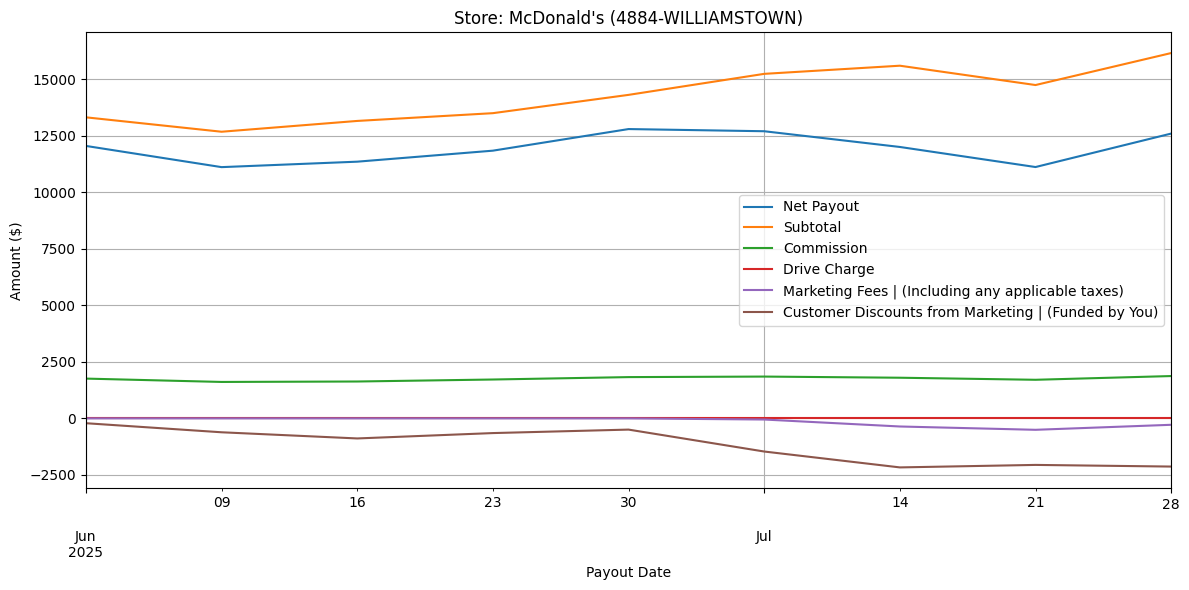

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert Payout Date to datetime
payout_data['Payout Date'] = pd.to_datetime(payout_data['Payout Date'])

# Group by Store and Payout Date and sum key metrics
metrics = [
    'Net Payout', 'Subtotal', 'Commission',
    'Drive Charge', 'Marketing Fees | (Including any applicable taxes)',
    'Customer Discounts from Marketing | (Funded by You)'
]

grouped = payout_data.groupby(['Store Name', 'Payout Date'])[metrics].sum().reset_index()

# Plot one graph per store
for store in grouped['Store Name'].unique():
    store_payout_data = grouped[grouped['Store Name'] == store]
    
    store_payout_data = store_payout_data.sort_values('Payout Date')
    store_payout_data.set_index('Payout Date', inplace=True)
    
    store_payout_data[metrics].plot(figsize=(12, 6), title=f"Store: {store}")
    plt.ylabel("Amount ($)")
    plt.xlabel("Payout Date")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
